## Analyzing the Stroop Effect

From: https://github.com/ksatola/Stroop-Effect

Perform the analysis in the space below based on provided dataset (stroopdata.csv) and answer the questions below.

(1) What is the independent variable? What is the dependent variable?

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

In [2]:
df = pd.read_csv('stroopdata.csv')
df.head(5)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
df.shape

(24, 2)

**Answer:** In the case of the Stroop test, the independent variable is whether the font name and color matched (they are congruent or not), and the dependent variable is the reaction time between the stimulus and the response.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

**Answer:**
$$
H_0 : \mu_{congruent} - \mu_{incongruent} = 0 \\
H_1 : \mu_{congruent} - \mu_{incongruent} < 0
$$
Where:

$ H_0 $ -> The null hypothesis: the reaction time in both cases (congruent and incongruent) is the same on average.

$ H_1 $ -> The alternative hypothesis: the reaction time when the colors and words do not correspond is slower on average.

If the null is true, than the mean reaction time difference between congruent and incongruent tests should be 0. I will assume type I error level at 1%.

In [4]:
# Adding a difference column to the dataset
df['difference'] = df.Incongruent - df.Congruent
df.head(5)

,Congruent,Incongruent,difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [5]:
df.describe()

,Congruent,Incongruent,difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,1.950000
25%,11.895250,18.716750,3.645500
50%,14.356500,21.017500,7.666500
75%,16.200750,24.051500,10.258500
max,22.328000,35.255000,21.919000


**Answer:** (measure of central tendency) The mean time difference is 7.96.

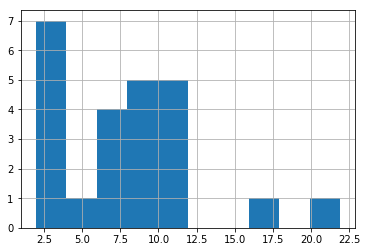

In [6]:
df.difference.hist();

**Answer:** (measures of variability) The standard deviation of the difference distribution is 4.86 and it is not normal (not even symetrical). The values range from 1.95 to 21.92 (spread equals to 19.97) with majority (75% of events) being below 10.26. The reaction time in case of incongruent tests seems to be always longer (minimum value in our sample is 1.95, never 0 nor below 0). It should be also the case in our population if the sample represents it truly (and we assume it does).

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

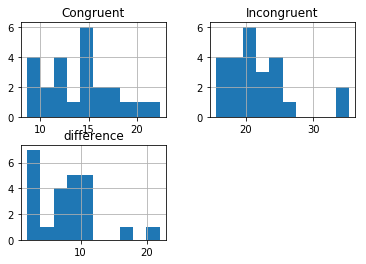

In [7]:
df.hist();

**Answer:** The sample data is not distributed normally. This could be due to the fact that there are only 24 observations in our sample.

(5) Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? Hint: Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [8]:
# Sampling distribution of the mean of differences
diffs = []

for _ in range(10000):
    bootsamp = df.sample(24, replace = True)
    diff_mean = bootsamp['difference'].mean()
    diffs.append(diff_mean)

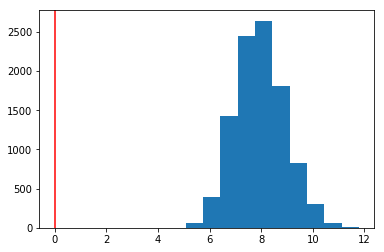

In [9]:
plt.hist(diffs);
plt.axvline(0, color = 'red'); # The mean value we should get if null is true

In [10]:
# Mean of the sampling distribution (the same as in the original sample)
np.mean(diffs)

7.96406895

In [11]:
# Standard deviation of the sampling distribution
np.std(diffs)

0.9677299288241933

In [12]:
# Building a confidence interval of 99%
np.percentile(diffs, 0.5), np.percentile(diffs, 99.5)

(5.650491041666666, 10.676746874999992)

In [13]:
# Simulate draws from the normal distribution, each of them represents a possible mean from the null hypothesis
null_vals = np.random.normal(0, np.std(diffs), 10000)

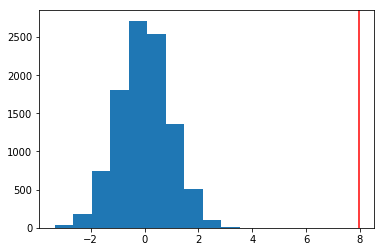

In [14]:
plt.hist(null_vals);
plt.axvline(df.difference.mean(), color = 'red'); # The mean value we should get when null is true

In [15]:
# Calculate p-value
(null_vals > df.difference.mean()).mean()

0.0

**Answer:** 
1. I used a sampling distribution of the mean of time differences to show how our statistic (the mean) changes from one sample to the next (bootstrapping - sampling with replacement) and to build a confidence interval for our parameter (the mean difference in time for the entire population). 
2. The sampling distribution was symetrical (almost normal) with the mean of 7.96 and standard deviation of 0.97.

**Approach 1: Using confidence interval technique:**

3. To achieve a confidence level of 99% I cut 0.5% from left and right ends of the sampling distribution. The interval of 5.65 to 10.67 did not cover 0. We can be 99% confident that the difference in the average differences was in the provided interval of 5.65 to 10.67.
4. Since the confidence interval did not contain zero, this suggested there was truly a difference in the average times between congruent and incongruent tests.

**Approach 2: Using hypothesis testing technique:**

5. The Type I error ($\alpha$) is choosing alternative while null is true (false positive), which in our case is saying that there is difference in the reaction times for congruent and incongruent tests where in reality such difference would not exist. The $\alpha$ chosen here is 0.01.
6. At the beginning I assumed that the null hypothesis is true.
7. With the second technique I simulated of what would be possible under null to see if our sample data is consistent with that. I used the standard deviation of the sampling distribution to determine what the sampling distribution would look like if it came from the null hypothesis (using the mean of 0 - the closest value to the alternative that is still in the null space).
8. Our sample's mean fell far above this distribution from the null beyond its tail. It is not much probable that this mean comes from this distribution of null so we can reject it.
9. The p-value (the probability of observing our statistic, or one more extreme in favor of the alternative, if the null hypothesis is true) is 0. The p-value value is also lower than $\alpha$. This confirms that we can reject our null hypothesis.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

**Answer:** 
The observed effect reveals that the brain can’t help but read. As habitual readers, we encounter and comprehend words on such a persistent basis that the reading occurs almost effortlessly, whereas declaration of a color requires more cognitive effort. When there is a conflict between these two sources of information, our cognitive load is increased, and our brains have to work harder to resolve the required difference. Performing these tasks (preventing reading, processing word color, and resolving information conflict) ultimately slows down our responses, and makes the task take longer.

Stroop effect permits to measure a person's selective attention capacity and skills, as well as their cognitive processing speed ability, their attentional capacity, and their level of cognitive control.

There are several variations and differing implementations of the test available, allowing different aspects of cognition to be honed in on. One of these variations is the “emotional Stroop test” in which participants complete both the original Stroop, and a version which has both neutral and emotionally charged words. The resulting text features words such as “pain” or “joy” amongst everyday words.

From:
- https://en.wikipedia.org/wiki/Stroop_effect
- https://imotions.com/blog/the-stroop-effect/